In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading files for EDA

In [2]:
train_trans=pd.read_csv('train_transaction.csv')
test_trans=pd.read_csv('test_transaction.csv')
train_id=pd.read_csv('train_identity.csv')
test_id=pd.read_csv('test_identity.csv')

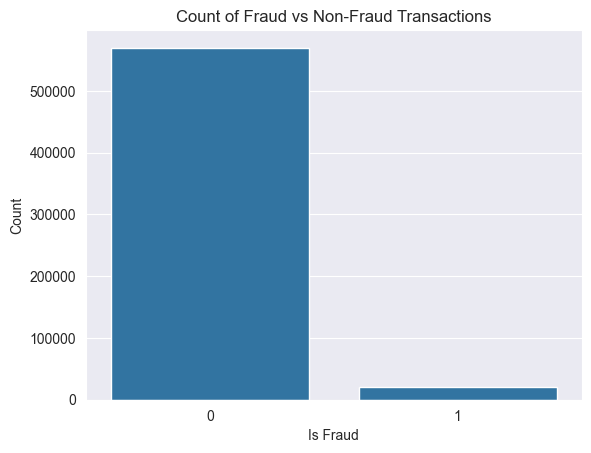

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot (bar chart) for isFraud
sns.countplot(x='isFraud', data=train_trans)
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [7]:
print(train_trans.shape)
print(train_id.shape)
print(test_trans.shape)
print(test_id.shape)

(590540, 394)
(144233, 41)
(506691, 393)
(141907, 41)


In [8]:
full=train_trans.merge(train_id, on='TransactionID', how='right')
print(full.shape)

(144233, 434)


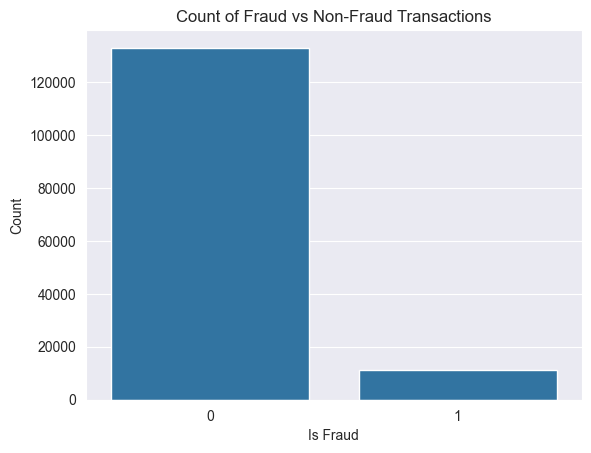

In [9]:
sns.countplot(x='isFraud', data=full)
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [7]:
full['isFraud'].value_counts(normalize=True)

isFraud
0    0.92153
1    0.07847
Name: proportion, dtype: float64

In [8]:
train_trans['isFraud'].value_counts(normalize=True)

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

As we found out the information provided by Vesta is useful for Fraud detecting 7.8% (with info) against 3.5% (full data)

In [3]:
full_train=train_trans.merge(train_id, on='TransactionID', how='left')
full_test=test_trans.merge(test_id, on='TransactionID', how='left')
print(full_train.shape)
print(full_test.shape)

(590540, 434)
(506691, 433)


# EDA

In [10]:
full_train=full_train.drop_duplicates()
print(full_train.shape)

(590540, 434)


In [11]:
full_train.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [12]:
# Show all columns when printing
pd.set_option('display.max_columns', None)

# Now this will display the count of missing values for all 434 columns
print(full_train.isna().sum())

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64


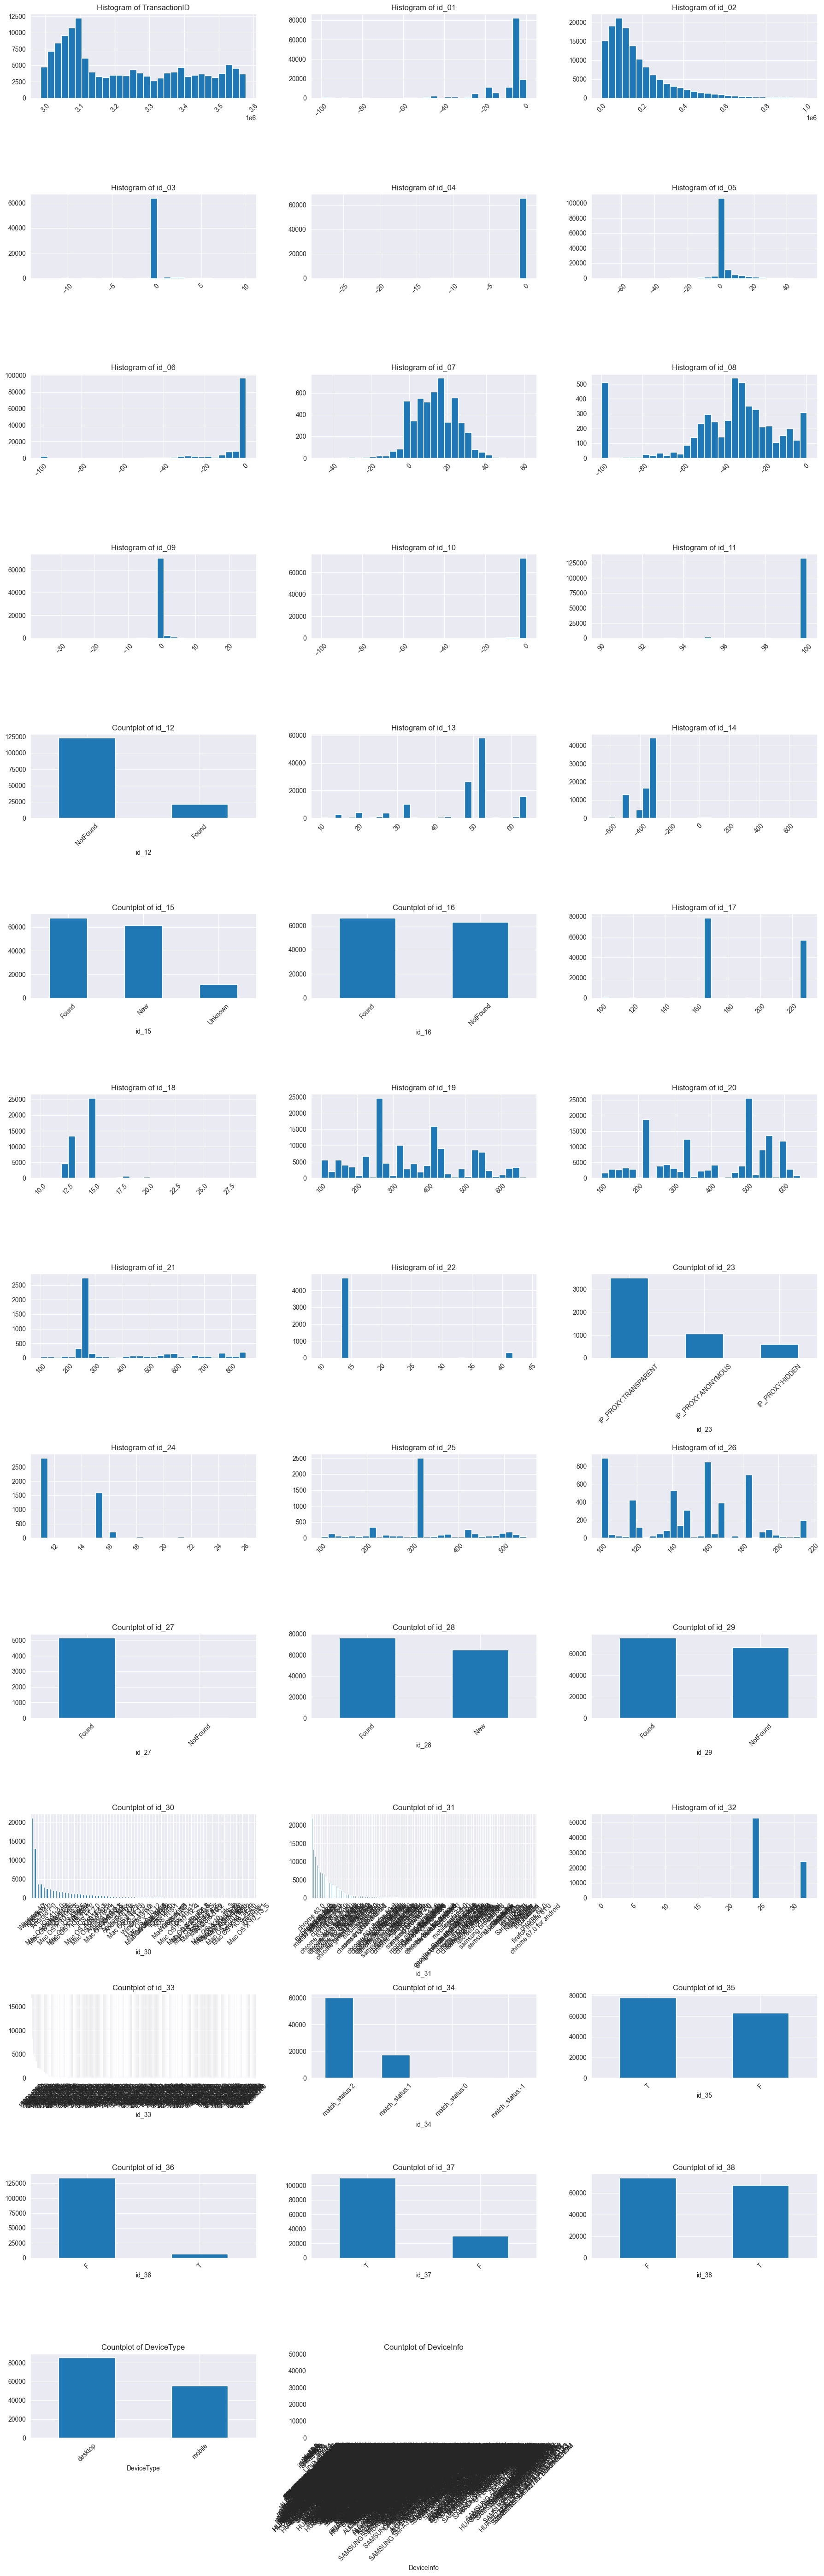

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of features
num_cols = len(train_id.columns)
num_rows = (num_cols + 2) // 3  # 3 columns per row, rounding up

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(train_id.columns):
    ax = axes[i]
    if pd.api.types.is_numeric_dtype(train_id[col]):
        train_id[col].hist(bins=30, ax=ax)
        ax.set_title(f'Histogram of {col}')
    else:
        # For categorical columns, show value counts
        train_id[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=45)

# Turn off empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
print(train_id.isna().sum())

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64


In [15]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

# PreTest of identity datasets

In [16]:
full=full[list(train_id.columns) + ['isFraud']]
full.shape


(144233, 42)

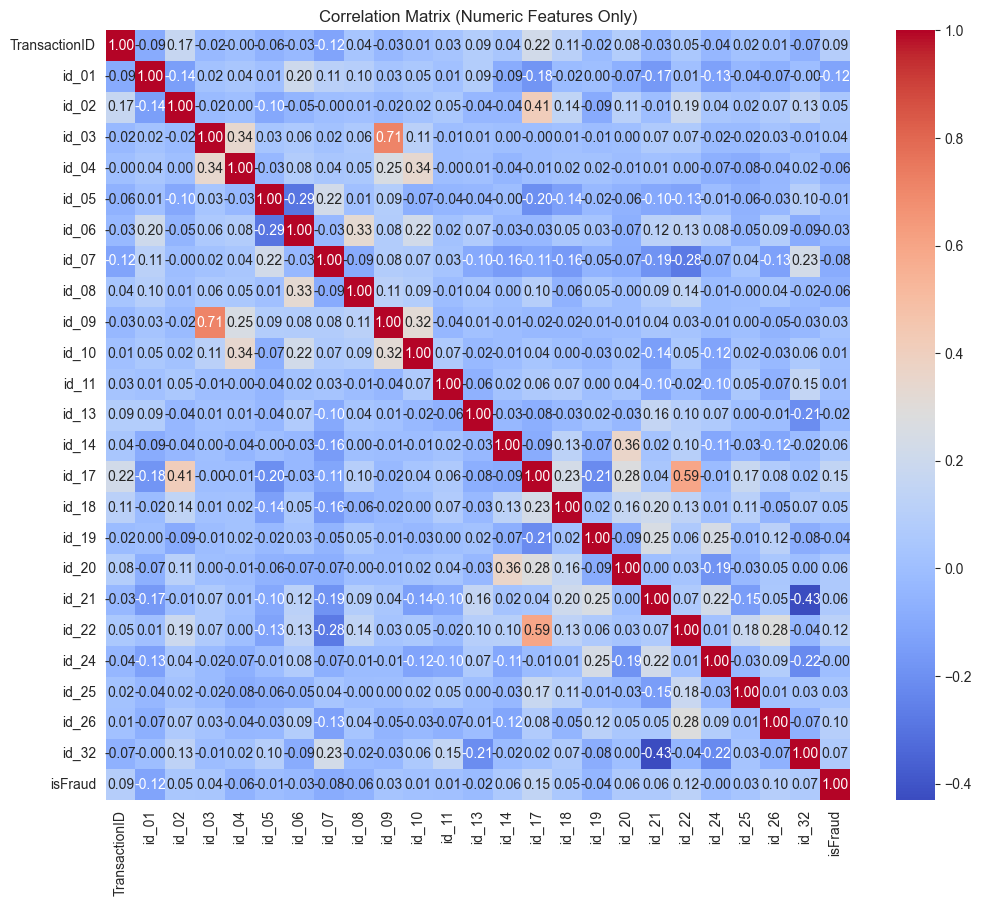

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = full.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()



# Optional: visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [18]:
# Select numeric columns only
numeric_df = full.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Get correlation of all features with target 'isFraud'
corr_with_target = corr_matrix['isFraud'].abs()

# Select features with correlation <= 0.05 (excluding 'isFraud' itself)
low_corr_features = corr_with_target[(corr_with_target <= 0.05) & (corr_with_target.index != 'isFraud')].index.tolist()

print("Features with correlation <= 0.05 with 'isFraud':")
print(low_corr_features)


Features with correlation <= 0.05 with 'isFraud':
['id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_19', 'id_24', 'id_25']


In [19]:
low_corr_features=['id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_19', 'id_24', 'id_25']

In [20]:
full.drop(columns=low_corr_features, inplace=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_04          66324 non-null   float64
 3   id_07          5155 non-null    float64
 4   id_08          5155 non-null    float64
 5   id_12          144233 non-null  object 
 6   id_14          80044 non-null   float64
 7   id_15          140985 non-null  object 
 8   id_16          129340 non-null  object 
 9   id_17          139369 non-null  float64
 10  id_18          45113 non-null   float64
 11  id_20          139261 non-null  float64
 12  id_21          5159 non-null    float64
 13  id_22          5169 non-null    float64
 14  id_23          5169 non-null    object 
 15  id_26          5163 non-null    float64
 16  id_27          5169 non-null    object 
 17  id_28          140978 non-nul

In [21]:
numeric_features = full.select_dtypes(include=['number']).columns.tolist()
print(numeric_features)


['TransactionID', 'id_01', 'id_04', 'id_07', 'id_08', 'id_14', 'id_17', 'id_18', 'id_20', 'id_21', 'id_22', 'id_26', 'id_32', 'isFraud']


In [22]:
numeric_features=['id_01', 'id_04', 'id_07', 'id_08', 'id_14', 'id_17', 'id_18', 'id_20', 'id_21', 'id_22', 'id_26', 'id_32']

In [23]:
full.drop(columns=numeric_features, inplace=True)

In [24]:
last_drops=['id_23', 'id_27', 'id_30', 'id_31', 'id_33', 'id_34', 'DeviceInfo']
full.drop(columns=last_drops, inplace=True)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TransactionID  144233 non-null  int64 
 1   id_12          144233 non-null  object
 2   id_15          140985 non-null  object
 3   id_16          129340 non-null  object
 4   id_28          140978 non-null  object
 5   id_29          140978 non-null  object
 6   id_35          140985 non-null  object
 7   id_36          140985 non-null  object
 8   id_37          140985 non-null  object
 9   id_38          140985 non-null  object
 10  DeviceType     140810 non-null  object
 11  isFraud        144233 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 13.2+ MB


In [26]:
fillna_dict={'id_15': 'None', 'id_16': 'None', 'id_23': 'Unknown',
             'id_27': 'Unknown', 'id_28':'None',
             'id_29': 'None', 'id_35': 'None', 'id_36': 'None',
             'id_37': 'None', 'id_38': 'None', 'DeviceType': 'Unknown'}

# PreTest Transaction datasets

In [11]:
print(train_trans.shape)
print(test_trans.shape)

(590540, 394)
(506691, 393)


In [28]:
nan_cols = train_trans.select_dtypes(include=['number']).columns[
    train_trans.select_dtypes(include=['number']).isna().mean() > 0.3
].tolist()

print(nan_cols)


['dist1', 'dist2', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V2

In [29]:
nan_cols=['dist1', 'dist2', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [30]:
train_trans.drop(columns=nan_cols, inplace=True)
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 211 entries, TransactionID to V321
dtypes: float64(193), int64(4), object(14)
memory usage: 950.7+ MB


In [31]:
# Select only numeric columns
numeric_cols = train_trans.select_dtypes(include=['number']).columns

# Calculate correlation with the target
corr_with_target = train_trans[numeric_cols].corr()['isFraud']

# Get features with correlation <= 0.05 (absolute value), excluding the target itself
low_corr_features = [
    col for col in corr_with_target.index
    if col != 'isFraud' and abs(corr_with_target[col]) <= 0.05
]

low_corr_features


['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'V13',
 'V14',
 'V19',
 'V20',
 'V25',
 'V26',
 'V27',
 'V28',
 'V41',
 'V53',
 'V54',
 'V61',
 'V65',
 'V66',
 'V68',
 'V76',
 'V88',
 'V89',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V279',
 'V280',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321']

In [32]:
low_corr=['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'V13',
 'V14',
 'V19',
 'V20',
 'V25',
 'V26',
 'V27',
 'V28',
 'V41',
 'V53',
 'V54',
 'V61',
 'V65',
 'V66',
 'V68',
 'V76',
 'V88',
 'V89',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V279',
 'V280',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321']

In [33]:
train_trans.drop(columns=low_corr, inplace=True)
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 103 entries, isFraud to V304
dtypes: float64(88), int64(1), object(14)
memory usage: 464.1+ MB


In [34]:
train_trans.describe()

,isFraud,card3,D1,D4,D10,D15,V12,V15,V16,V17,V18,V21,V22,V23,V24,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V55,V56,V57,V58,V59,V60,V62,V63,V64,V67,V69,V70,V71,V72,V73,V74,V75,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V90,V91,V92,V93,V94,V108,V109,V110,V111,V112,V113,V114,V115,V116,V123,V124,V125,V281,V282,V283,V302,V303,V304
count,590540.000000,588975.000000,589271.000000,421618.000000,514518.000000,501427.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000
mean,0.034990,153.194925,94.347568,140.002441,123.982137,163.744579,0.559711,0.122342,0.123460,0.134040,0.135363,0.129684,0.132292,1.034791,1.058097,0.387840,0.406436,0.140761,0.142417,0.130693,0.139154,0.542594,0.579198,1.108065,1.16240,0.166076,0.177145,0.156118,0.168942,1.083891,1.120779,1.022286,1.038515,0.383174,0.397724,0.164746,0.170579,0.182695,1.067670,1.120979,0.128312,0.132453,0.134433,0.142537,0.867563,0.130743,0.141825,0.998121,0.390200,0.407924,0.140639,0.145124,0.139982,0.152147,0.544278,1.086893,1.144462,0.136867,0.143954,0.152696,0.844610,0.881965,0.137145,0.149788,1.064885,1.099456,0.401862,0.420461,0.150322,0.154812,0.137007,1.004613,1.014816,1.007739,1.002563,1.005356,1.003383,1.009298,1.032450,1.015738,1.031120,1.092975,1.050415,0.087783,0.817171,0.991114,0.251761,0.283140,0.264208
std,0.183755,11.336444,157.660387,191.096774,182.615225,202.726660,0.510533,0.332422,0.342841,0.364456,0.371763,0.339060,0.359415,0.247681,0.305485,0.510652,0.554311,0.355793,0.368278,0.340900,0.357549,0.516010,0.539039,0.690571,0.85892,0.451956,0.505786,0.382896,0.433359,0.639143,0.729774,0.166719,0.231862,0.508189,0.542654,0.373995,0.403899,0.439002,0.391364,0.661129,0.349094,0.372907,0.379291,0.418230,0.483803,0.355262,0.406157,0.245912,0.513696,0.554499,0.364303,0.389212,0.367098,0.393274,0.514318,0.532958,0.781474,0.379904,0.409932,0.452298,0.422529,0.470757,0.361875,0.419445,0.419807,0.511281,0.516153,0.561865,0.375682,0.402314,0.343878,0.081146,0.127769,0.097290,0.070830,0.084617,0.074754,0.110179,0.190385,0.136770,0.228134,0.374103,0.280037,0.512748,0.921880,1.558731,0.481889,0.623608,0.528238
min,0.000000,100.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
numeric_cols = train_trans.select_dtypes(include=['number']).columns
print(numeric_cols)


fill_dict={'card3': mode(), 'card4': 'Unknown',  'card6': 'debit or credit',
           'P_emaildomain': 'Unknown', 'D1': mode(),
           'D4': mode(), 'D10': mode(), 'D15': mode(),'M1': 'None',
           'M2': 'None', 'M3': 'None', 'M4': 'None', 'M5': 'None',
           'M6': 'None', 'M7': 'None', 'M8': 'None', 'M9': 'None'}

fill_dict={'card3': mode(), 'card4': 'Unknown',  'card6': 'debit or credit',
           'P_emaildomain': 'Unknown', 'D1': mode(),
           'D4': mode(), 'D10': mode(), 'D15': mode(),'M1': 'None',
           'M2': 'None', 'M3': 'None', 'M4': 'None', 'M5': 'None',
           'M6': 'None', 'M7': 'None', 'M8': 'None', 'M9': 'None'}

# Split before modeling

In [4]:
print(full_train.shape)
print(full_test.shape)

(590540, 434)
(506691, 433)


In [5]:
X = full_train.drop(columns=['isFraud'])
y = full_train['isFraud']


In [6]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder  # pip install category_encoders

# 1️⃣ Custom transformer to drop columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cols):
        self.drop_cols = drop_cols
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=self.drop_cols, errors='ignore')

# 2️⃣ Custom transformer to fill NaNs
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class NaNFiller(BaseEstimator, TransformerMixin):
    def __init__(self, fill_map=None):
        self.fill_map = fill_map  # **no copy here**

    def fit(self, X, y=None):
        self.fill_map_fitted_ = self.fill_map.copy() if self.fill_map else {}

        for col, val in self.fill_map_fitted_.items():
            if val == 'mode()' and col in X.columns:
                self.fill_map_fitted_[col] = X[col].mode(dropna=True)[0]

        numeric_cols = X.select_dtypes(include=['number']).columns
        for col in numeric_cols:
            if col not in self.fill_map_fitted_:
                self.fill_map_fitted_[col] = X[col].mode(dropna=True)[0]

        return self

    def transform(self, X):
        return X.fillna(self.fill_map_fitted_)


# ===== Feature lists from your question =====
numeric_features = ['id_01', 'id_04', 'id_07', 'id_08', 'id_14', 'id_17', 'id_18', 'id_20', 'id_21', 'id_22', 'id_26', 'id_32']
low_corr_features = ['id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_19', 'id_24', 'id_25']
last_drops = ['id_23', 'id_27', 'id_30', 'id_31', 'id_33', 'id_34', 'DeviceInfo']
nan_cols = ['dist1', 'dist2', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']
low_corr = ['TransactionID','TransactionDT','TransactionAmt','card1','card2','card5','addr1','addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','V13','V14','V19','V20','V25','V26','V27','V28','V41','V53','V54','V61','V65','V66','V68','V76','V88','V89','V95','V96','V97','V98','V99','V100','V101','V102','V103','V104','V105','V106','V107','V117','V118','V119','V120','V121','V122','V126','V127','V128','V129','V130','V131','V132','V133','V134','V135','V136','V137','V279','V280','V284','V285','V286','V287','V288','V289','V290','V291','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315','V316','V317','V318','V319','V320','V321']

drop_all = numeric_features + low_corr_features + last_drops + nan_cols + low_corr

# NaN fill mapping
fill_map = {
    'id_15': 'Joe', 'id_16': 'Joe',
    'id_28': 'Joe', 'id_29': 'Joe', 'id_35': 'Joe', 'id_36': 'Joe',
    'id_37': 'Joe', 'id_38': 'Joe', 'DeviceType': 'Unknown', 'card3': 'mode()',
    'card4': 'Unknown', 'card6': 'debit or credit', 'P_emaildomain': 'Unknown',
    'D1': 'mode()', 'D4': 'mode()', 'D10': 'mode()', 'D15': 'mode()',
    'M1': 'Joe', 'M2': 'Joe', 'M3': 'Joe', 'M4': 'Joe', 'M5': 'Joe',
    'M6': 'Joe', 'M7': 'Joe', 'M8': 'Joe', 'M9': 'Joe'
}

# 3️⃣ Function to separate onehot vs binary encoding
def split_categoricals(X):
    cat_cols = X.select_dtypes(include=['object', 'category']).columns
    onehot_cols = [col for col in cat_cols if X[col].nunique() <= 20]
    binary_cols = [col for col in cat_cols if X[col].nunique() > 20]
    return onehot_cols, binary_cols

# Example preprocessor creation
class DynamicPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.preprocessor = None

    def fit(self, X, y=None):
        onehot_cols, binary_cols = split_categoricals(X)
        numeric_cols = X.select_dtypes(include=['number']).columns

        self.preprocessor = ColumnTransformer([
            ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
            ('binary', BinaryEncoder(), binary_cols),
            ('scale', StandardScaler(), numeric_cols)
        ])
        self.preprocessor.fit(X, y)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

basic_pipeline = Pipeline([
    ('drop', ColumnDropper(drop_all)),
    ('fill', NaNFiller(fill_map=fill_map)),
    ('encode_scale', DynamicPreprocessor())
])

In [8]:
# Transform the data
transformed = basic_pipeline.fit_transform(X)

# Check the result type
import pandas as pd
if isinstance(transformed, pd.DataFrame):
    print(transformed.dtypes)
else:
    # If it's a NumPy array, check dtype
    print(transformed.dtype)


float64


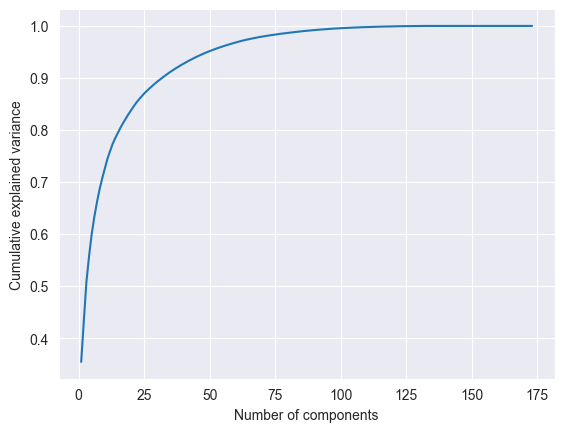

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=173)
pca.fit(transformed)  # preprocessed_data = output of your basic_pipeline.transform(X)

import matplotlib.pyplot as plt

plt.plot(range(1, 174), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()


In [9]:
import numpy as np

print("Type:", type(transformed))
print("Shape:", transformed.shape)
print("Has NaNs?", np.isnan(transformed).any())
print("Is numeric?", np.issubdtype(transformed.dtype, np.number))


Type: <class 'numpy.ndarray'>
Shape: (590540, 173)
Has NaNs? False
Is numeric? True


# Baseline models

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define model pipelines
log_reg_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear'))
])

rf_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

gb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', GradientBoostingClassifier(random_state=42))
])

svm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', SVC(probability=True, kernel='rbf', random_state=42))
])

knn_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

xgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Evaluation of models

In [15]:
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define pipeline
log_reg_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Perform cross-validation for ROC AUC
roc_auc_scores = cross_val_score(
    log_reg_pipeline,
    X,  # your feature matrix
    y,  # your target
    cv=3,               # 5-fold CV
    scoring='roc_auc',  # metric
    n_jobs=1          # parallel processing
)

print("ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

ROC AUC scores per fold: [0.7682207  0.79700831 0.81055199]
Mean ROC AUC: 0.7919269970412349


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Perform cross-validation for ROC AUC
roc_auc_scores = cross_val_score(
    rf_pipeline,
    X,  # your feature matrix
    y,  # your target
    cv=3,               # 3-fold CV (you had 3, comment says 5, so I keep 3)
    scoring='roc_auc',  # metric
    n_jobs=1            # parallel processing
)

print("ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

ROC AUC scores per fold: [0.80099111 0.83678132 0.81136104]
Mean ROC AUC: 0.8163778250807926


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Perform cross-validation for ROC AUC
roc_auc_scores = cross_val_score(
    gb_pipeline,
    X,  # your feature matrix
    y,  # your target
    cv=3,               # 3-fold CV
    scoring='roc_auc',  # metric
    n_jobs=1            # parallel processing
)

print("ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

ROC AUC scores per fold: [0.7802575  0.82612202 0.81140664]
Mean ROC AUC: 0.8059287202122706


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# SVM pipeline
svm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', LinearSVC(max_iter=10000, random_state=42))
])

roc_auc_scores_svm = cross_val_score(
    svm_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("SVM ROC AUC scores per fold:", roc_auc_scores_svm)
print("SVM Mean ROC AUC:", roc_auc_scores_svm.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

SVM ROC AUC scores per fold: [0.76035475 0.77853204 0.79894684]
SVM Mean ROC AUC: 0.779277872923828


In [17]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression

svm_pipeline_2 = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('rbf_feature', RBFSampler(gamma=1, random_state=42, n_components=100)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

roc_auc_scores_svm = cross_val_score(
    svm_pipeline_2,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("Kernel Approximation + Logistic Regression ROC AUC scores per fold:", roc_auc_scores_svm)
print("Mean ROC AUC:", roc_auc_scores_svm.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

Kernel Approximation + Logistic Regression ROC AUC scores per fold: [0.52560094 0.54976898 0.53806208]
Mean ROC AUC: 0.5378106639402859


In [13]:
# KNN pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

knn_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

roc_auc_scores_knn = cross_val_score(
    knn_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("KNN ROC AUC scores per fold:", roc_auc_scores_knn)
print("KNN Mean ROC AUC:", roc_auc_scores_knn.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

KNN ROC AUC scores per fold: [0.68454218 0.73117114 0.70990363]
KNN Mean ROC AUC: 0.7085389848646848


In [14]:
# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

roc_auc_scores_xgb = cross_val_score(
    xgb_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("XGBoost ROC AUC scores per fold:", roc_auc_scores_xgb)
print("XGBoost Mean ROC AUC:", roc_auc_scores_xgb.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [09:17:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [09:17:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
G:\My Drive\Colab Notebooks\Competition\IEEE-

XGBoost ROC AUC scores per fold: [0.79023937 0.84478865 0.82353107]
XGBoost Mean ROC AUC: 0.8195196970816081


In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score

hgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', HistGradientBoostingClassifier(random_state=42))
])

roc_auc_scores_hgb = cross_val_score(
    hgb_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("HistGradientBoosting ROC AUC scores per fold:", roc_auc_scores_hgb)
print("HistGradientBoosting Mean ROC AUC:", roc_auc_scores_hgb.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

HistGradientBoosting ROC AUC scores per fold: [0.80509362 0.85388549 0.83811595]
HistGradientBoosting Mean ROC AUC: 0.8323650208577318


In [11]:
from sklearn.ensemble import ExtraTreesClassifier

et_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', ExtraTreesClassifier(random_state=42))
])

roc_auc_scores_et = cross_val_score(
    et_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("Extra Trees ROC AUC scores per fold:", roc_auc_scores_et)
print("Extra Trees Mean ROC AUC:", roc_auc_scores_et.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

Extra Trees ROC AUC scores per fold: [0.79577364 0.82543121 0.8062331 ]
Extra Trees Mean ROC AUC: 0.809145986443041


In [13]:
from lightgbm import LGBMClassifier

lgbm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', LGBMClassifier(random_state=42))
])

roc_auc_scores_lgbm = cross_val_score(
    lgbm_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("LightGBM ROC AUC scores per fold:", roc_auc_scores_lgbm)
print("LightGBM Mean ROC AUC:", roc_auc_scores_lgbm.mean())


[LightGBM] [Info] Number of positive: 13775, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 393693, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317100
[LightGBM] [Info] Start training from score -3.317100


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13775, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 393693, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317100
[LightGBM] [Info] Start training from score -3.317100


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13776, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 393694, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034992 -> initscore=-3.317027
[LightGBM] [Info] Start training from score -3.317027


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM ROC AUC scores per fold: [0.80171606 0.85484142 0.83943034]
LightGBM Mean ROC AUC: 0.8319959394868989


In [14]:
from catboost import CatBoostClassifier

catboost_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

roc_auc_scores_catboost = cross_val_score(
    catboost_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

print("CatBoost ROC AUC scores per fold:", roc_auc_scores_catboost)
print("CatBoost Mean ROC AUC:", roc_auc_scores_catboost.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

CatBoost ROC AUC scores per fold: [0.79793537 0.84969541 0.83736763]
CatBoost Mean ROC AUC: 0.8283328065977296


# Hyperparameter tuning

## HistGradientBoosting

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score

# Pipeline with given parameters
hgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=75, random_state=42)),
    ('model', HistGradientBoostingClassifier(
        random_state=42,
        min_samples_leaf=50,
        max_leaf_nodes=31,
        max_iter=150,
        max_depth=7,
        max_bins=128,
        learning_rate=0.1
    ))
])

# Cross-validation
roc_auc_scores_hgb = cross_val_score(
    hgb_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

# Output
print("HistGradientBoosting ROC AUC scores per fold:", roc_auc_scores_hgb)
print("HistGradientBoosting Mean ROC AUC:", roc_auc_scores_hgb.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

HistGradientBoosting ROC AUC scores per fold: [0.81627242 0.86201111 0.84171847]
HistGradientBoosting Mean ROC AUC: 0.8400006686496791


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score

# Pipeline with given parameters
hgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', HistGradientBoostingClassifier(
        random_state=42,
        min_samples_leaf=50,
        max_leaf_nodes=31,
        max_iter=150,
        max_depth=7,
        max_bins=128,
        learning_rate=0.1
    ))
])

# Cross-validation
roc_auc_scores_hgb = cross_val_score(
    hgb_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

# Output
print("HistGradientBoosting ROC AUC scores per fold:", roc_auc_scores_hgb)
print("HistGradientBoosting Mean ROC AUC:", roc_auc_scores_hgb.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

HistGradientBoosting ROC AUC scores per fold: [0.81647387 0.86276019 0.84349502]
HistGradientBoosting Mean ROC AUC: 0.8409096935285708


## LGBMClassifier

In [10]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import numpy as np

# Best parameters from Optuna
best_params = {
    'model__colsample_bytree': float(0.903327178254203),
    'model__learning_rate': float(0.08912437622456135),
    'model__max_bin': 63,
    'model__max_depth': 6,
    'model__min_child_samples': 24,
    'model__n_estimators': 136,
    'model__num_leaves': 47,
    'model__subsample': float(0.9266202914546536)
}

# Define pipeline with best parameters
lgbm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', LGBMClassifier(random_state=42))
])

# Set parameters into the pipeline
lgbm_pipeline.set_params(**best_params)

# Cross-validation
roc_auc_scores = cross_val_score(
    lgbm_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1  # keep 1 for memory efficiency
)

print("ROC AUC per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


[LightGBM] [Info] Number of positive: 13775, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5040
[LightGBM] [Info] Number of data points in the train set: 393693, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317100
[LightGBM] [Info] Start training from score -3.317100


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13775, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5040
[LightGBM] [Info] Number of data points in the train set: 393693, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034989 -> initscore=-3.317100
[LightGBM] [Info] Start training from score -3.317100


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13776, number of negative: 379918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5040
[LightGBM] [Info] Number of data points in the train set: 393694, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034992 -> initscore=-3.317027
[LightGBM] [Info] Start training from score -3.317027


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC AUC per fold: [0.82033464 0.86321617 0.84673961]
Mean ROC AUC: 0.8434301390075302


## CatboostClassifier

In [12]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_state': 42,
        'verbose': 0
    }

    catboost_pipeline = Pipeline([
        ('preprocess', basic_pipeline),
        ('pca', TruncatedSVD(n_components=50, random_state=42)),
        ('model', CatBoostClassifier(**params))
    ])

    score = cross_val_score(
        catboost_pipeline,
        X,
        y,
        cv=3,
        scoring='roc_auc',
        n_jobs=1  # keep 1 for lower memory usage
    ).mean()

    return score

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best ROC AUC:", study.best_value)


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-13 22:04:01,590] A new study created in memory with name: no-name-49cce161-2e2f-4ff3-922f-eb454359ab15
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as 

Best parameters: {'iterations': 429, 'depth': 8, 'learning_rate': 0.10632735240192881, 'l2_leaf_reg': 9.785800503889446, 'bagging_temperature': 0.7037313720297027, 'border_count': 183}
Best ROC AUC: 0.8352582556497937


In [13]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

# Best parameters from Optuna
best_params = {
    'iterations': 429,
    'depth': 8,
    'learning_rate': 0.10632735240192881,
    'l2_leaf_reg': 9.785800503889446,
    'bagging_temperature': 0.7037313720297027,
    'border_count': 183,
    'random_state': 42,
    'verbose': 0
}

# Build pipeline with best params
catboost_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', CatBoostClassifier(**best_params))
])

# Cross-validate ROC AUC
roc_auc_scores = cross_val_score(
    catboost_pipeline,
    X,
    y,
    cv=3,
    scoring='roc_auc',
    n_jobs=1  # keep sequential to avoid memory spikes
)

print("CatBoost ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

CatBoost ROC AUC scores per fold: [0.81908465 0.86050364 0.84875544]
Mean ROC AUC: 0.8427812415259824


In [14]:
import optuna
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'max_iter': trial.suggest_int('max_iter', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 15, 63),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 20, 100),
        'l2_regularization': trial.suggest_float('l2_regularization', 1e-4, 1.0, log=True),
        'random_state': 42
    }

    hgb_pipeline = Pipeline([
        ('preprocess', basic_pipeline),
        ('pca', TruncatedSVD(n_components=50, random_state=42)),
        ('model', HistGradientBoostingClassifier(**params))
    ])

    # 2 folds to save time/memory during tuning
    score = cross_val_score(
        hgb_pipeline,
        X,
        y,
        cv=2,
        scoring='roc_auc',
        n_jobs=1  # keep sequential to avoid parallel memory spikes
    ).mean()

    return score

# Create and run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best ROC AUC:", study.best_value)


[I 2025-08-13 23:47:48,623] A new study created in memory with name: no-name-d646fe70-b7ca-4e67-b28b-3cd2a97faab8
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
[I 2025-08-13 23:48:46,767] Trial 0 finished with value: 0.8068496171776731 and parameters: {'max_iter': 85, 'max_depth': 7, 'learning_rate': 0.02409157047808199, 'max_leaf_nodes': 18, 'mi

Best parameters: {'max_iter': 161, 'max_depth': 8, 'learning_rate': 0.0992438517843764, 'max_leaf_nodes': 38, 'min_samples_leaf': 67, 'l2_regularization': 0.0790148511150063}
Best ROC AUC: 0.8293027466014444


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

# Best parameters from Optuna
best_params = {
    'max_iter': 161,
    'max_depth': 8,
    'learning_rate': 0.0992438517843764,
    'max_leaf_nodes': 38,
    'min_samples_leaf': 67,
    'l2_regularization': 0.0790148511150063,
    'random_state': 42
}

# Build pipeline with best params
hgb_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', HistGradientBoostingClassifier(**best_params))
])

# Cross-validate ROC AUC
roc_auc_scores = cross_val_score(
    hgb_pipeline,
    X,
    y,
    cv=3,               # 3-fold CV
    scoring='roc_auc',
    n_jobs=1            # keep sequential to reduce memory usage
)

print("HGB ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 in

HGB ROC AUC scores per fold: [0.81984861 0.86698046 0.84693665]
Mean ROC AUC: 0.8445885716441065


In [16]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 16, 64),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'max_bin': trial.suggest_int('max_bin', 63, 127),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 1.0, log=True),
        'random_state': 42,
        'verbosity': -1
    }

    lgbm_pipeline = Pipeline([
        ('preprocess', basic_pipeline),
        ('pca', TruncatedSVD(n_components=50, random_state=42)),
        ('model', LGBMClassifier(**params))
    ])

    score = cross_val_score(
        lgbm_pipeline,
        X,
        y,
        cv=2,            # fewer folds during tuning to save memory/time
        scoring='roc_auc',
        n_jobs=1         # sequential to avoid parallel memory usage
    ).mean()

    return score

# Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best ROC AUC:", study.best_value)


[I 2025-08-14 00:41:46,520] A new study created in memory with name: no-name-68b7ad80-66a5-464b-8712-eb560a34bb63
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.

Best parameters: {'num_leaves': 44, 'max_depth': 8, 'learning_rate': 0.05215599904280897, 'n_estimators': 284, 'min_child_samples': 21, 'subsample': 0.9980466384204061, 'colsample_bytree': 0.8602632763891599, 'max_bin': 88, 'reg_alpha': 0.41066820489616934, 'reg_lambda': 0.0013827546650967192}
Best ROC AUC: 0.8335514520831239


In [17]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

# Best parameters from Optuna
best_params = {
    'num_leaves': 44,
    'max_depth': 8,
    'learning_rate': 0.05215599904280897,
    'n_estimators': 284,
    'min_child_samples': 21,
    'subsample': 0.9980466384204061,
    'colsample_bytree': 0.8602632763891599,
    'max_bin': 88,
    'reg_alpha': 0.41066820489616934,
    'reg_lambda': 0.0013827546650967192,
    'random_state': 42,
    'verbosity': -1
}

# Build pipeline with best parameters
lgbm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', LGBMClassifier(**best_params))
])

# Cross-validation for ROC AUC
roc_auc_scores = cross_val_score(
    lgbm_pipeline,
    X,
    y,
    cv=3,            # 3-fold CV for more stable estimate
    scoring='roc_auc',
    n_jobs=1         # sequential to avoid memory spikes
)

print("LGBM ROC AUC scores per fold:", roc_auc_scores)
print("Mean ROC AUC:", roc_auc_scores.mean())


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detectio

LGBM ROC AUC scores per fold: [0.82162579 0.87019891 0.85110849]
Mean ROC AUC: 0.8476444001002909


# Ensembling

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Best params for LGBM
lgbm_best_params = {
    'num_leaves': 44,
    'max_depth': 8,
    'learning_rate': 0.05215599904280897,
    'n_estimators': 284,
    'min_child_samples': 21,
    'subsample': 0.9980466384204061,
    'colsample_bytree': 0.8602632763891599,
    'max_bin': 88,
    'reg_alpha': 0.41066820489616934,
    'reg_lambda': 0.0013827546650967192,
    'random_state': 42,
    'verbosity': -1
}

lgbm_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', LGBMClassifier(**lgbm_best_params))
])


# Best params for CatBoost
catboost_best_params = {
    'iterations': 429,
    'depth': 8,
    'learning_rate': 0.10632735240192881,
    'l2_leaf_reg': 9.785800503889446,
    'bagging_temperature': 0.7037313720297027,
    'border_count': 183,
    'random_state': 42,
    'verbose': 0
}

catboost_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=80, random_state=42)),
    ('model', CatBoostClassifier(**catboost_best_params))
])

rf_pipeline = Pipeline([
    ('preprocess', basic_pipeline),
    ('pca', TruncatedSVD(n_components=50, random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

stack = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_pipeline),
        ('cat', catboost_pipeline)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=3,
    n_jobs=1  # memory safety
)

In [26]:
roc_auc_scores_stack = cross_val_score(
    stack,
    X,
    y,
    cv=3,                      # outer CV
    scoring='roc_auc',
    n_jobs=1                   # keep low for RAM
)

print("Stacked model ROC AUC scores per fold:", roc_auc_scores_stack)
print("Stacked model Mean ROC AUC:", roc_auc_scores_stack.mean())

G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detectio

Stacked model ROC AUC scores per fold: [0.82495213 0.8712214  0.85426475]
Stacked model Mean ROC AUC: 0.8501460947726218


# Final Training

In [27]:
stack.fit(X,y)

G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detectio

,estimators,"[('lgbm', ...), ('cat', ...)]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,3
,stack_method,'auto'
,n_jobs,1
,passthrough,False
,verbose,0
,steps,"[('drop', ...), ('fill', ...), ...]"
,transform_input,None
,memory,None
,verbose,False


In [56]:
# Replace '-' with '_' in column names
full_test.columns = full_test.columns.str.replace('-', '_')

 # Should print True


In [58]:
# Predict probability of fraud for full_test
y_pred_proba = stack.predict_proba(full_test)[:, 1]  # 1 → positive class

# Create submission DataFrame
submission = pd.DataFrame({
    'TransactionID': full_test['TransactionID'],
    'isFraud': y_pred_proba
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
G:\My Drive\Colab Notebooks\Competition\IEEE-CIS Fraud Detection\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Submission file saved as 'submission.csv'


In [60]:
submission.shape

(506691, 2)

In [63]:
import subprocess

with open('requirement.txt', 'w') as f:
    subprocess.run(['pip', 'freeze'], stdout=f)